In [10]:
language_data=pd.read_csv('Languages.csv')
language_data.iloc[1,0] = "Chinese"
language_data.iloc[4,0] = "Arabic"
language_data

,Language,PLI_2016,PLI_2050,S_L(0),L2(0)
0,English,0.889,0.877,1515000000,1135000000
1,Chinese,0.411,0.515,1140000000,199000000
2,Hindi,0.117,0.138,609000000,264000000
3,Spanish,0.329,0.345,560000000,74000000
4,Arabic,0.273,0.295,332000000,332000000
5,French,0.337,0.325,312000000,238000000
6,Bengali,0.029,0.029,278000000,41000000
7,Portuguese,0.119,0.149,264000000,27000000
8,Russian,0.244,0.242,255000000,108000000
9,Urdu,0.040,0.040,238000000,168000000


In [11]:
country_data = pd.read_csv('byCountry.csv')
country_data

,i,N^i(0),m^i,b^i,d^i,p_1^i,p_2^i,p_3^i,p_4^i,p_5^i,p_6^i,p_7^i,p_8^i,p_9^i,p_10^i
0,country,population,migration \nrate,birth \nrate,death \nrate,English,Chinese,Hindi,Spanish,Arabic,French,Bengali,Portuguese,Russian,Urdu
1,nauru,9892,-0.0098,0.0202,0.0065,0.020,0.020,0,0,0,0,0,0,0,0
2,palau,21864,0.0007,0.0116,0.0084,0.155,0.018,0,0,0,0,0,0,0,0
3,american-samoa,43895,-0.0248,0.0157,0.0063,0.029,0,0,0,0,0,0,0,0,0
4,gibraltar,29683,-0.0032,0.0137,0.0087,0.889,0,0,0,0.074,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,virgin-islands,104377,-0.0073,0.0111,0.0092,0.747,0,0,0.168,0,0.066,0,0,0,0
152,wallis-and-futuna,15964,-0.0036,0.0118,0.0060,0,0,0,0,0,0.108,0,0,0,0
153,united-states,341963408,0.0030,0.0122,0.0085,0.821,0.009,0,0.107,0,0.007,0,0.002,0.002,0
154,india,1409128296,0.0001,0.0162,0.0091,0.032,0,0.400,0,0,0,0.080,0,0,0.050


In [15]:
language_dict = {"English" : "p_1^i", "Chinese": "p_2^i", "Hindi" : "p_3^i", "Spanish" : "p_4^i", "Arabic" : "p_5^i", 
                 "French" : "p_6^i", "Bengali" : "p_7^i", "Portuguese" : "p_8^i", "Russian" : "p_9^i", "Urdu" : "p_10^i"}


In [16]:
country_list = country_data["i"]
country_list

0                country
1                  nauru
2                  palau
3         american-samoa
4              gibraltar
             ...        
151       virgin-islands
152    wallis-and-futuna
153        united-states
154                india
155                china
Name: i, Length: 156, dtype: object

In [17]:
country_list = country_list.tolist()

In [18]:
del country_list[0]
country_list

['nauru',
 'palau',
 'american-samoa',
 'gibraltar',
 'bermuda',
 'andorra',
 'seychelles',
 'aruba',
 'guam',
 'samoa',
 'vanuatu',
 'belize',
 'malta',
 'luxembourg',
 'comoros',
 'fiji',
 'djibouti',
 'bolivia',
 'estonia',
 'mauritius',
 'brunei',
 'burkina-faso',
 'cyprus',
 'bahrain',
 'latvia',
 'guinea-bissau',
 'cayman-islands',
 'central-african-republic',
 'botswana',
 'gabon',
 'costa-rica',
 'lithuania',
 'namibia',
 'cook-islands',
 'dominican-republic',
 'jamaica',
 'curacao',
 'armenia',
 'el-salvador',
 'hong-kong',
 'qatar',
 'kuwait',
 'uruguay',
 'oman',
 'equatorial-guinea',
 'georgia',
 'nepal',
 'panama',
 'liberia',
 'french-polynesia',
 'norway',
 'finland',
 'turkmenistan',
 'denmark',
 'puerto-rico',
 'kyrgyzstan',
 'new-zealand',
 'ireland',
 'lebanon',
 'switzerland',
 'togo',
 'singapore',
 'nicaragua',
 'iran',
 'libya',
 'paraguay',
 'israel',
 'tajikistan',
 'sweden',
 'azerbaijan',
 'jersey',
 'belarus',
 'honduras',
 'united-arab-emirates',
 'portugal

In [98]:
def change_per_country(language, country,time):
    
    row = country_data[country_data["i"] == country]
    lang_index = language_dict[language]
    p_L = row[lang_index].astype(float)
    birth_rate = row["b^i"].astype(float)
    death_rate = row["d^i"].astype(float)
    migration_rate = row["m^i"].astype(float)
    init_pop = row["N^i(0)"].astype(float)
    current_pop = init_pop* pow(1 + birth_rate - death_rate + migration_rate, time)
    # change = p_L*(birth_rate - death_rate + migration_rate)*pow(1 + birth_rate - death_rate + migration_rate,time)*init_pop
    next_pop = float(p_L*birth_rate*current_pop - p_L*death_rate*current_pop + p_L*migration_rate*current_pop)
    return next_pop

change_per_country("English", "palau", 50)

16.05641688294048

In [114]:
def change_per_country_table(language, country,time):
    
       
    
    row = country_data[country_data["i"] == country]
    lang_index = language_dict[language]
    p_L = float(row[lang_index])
    birth_rate = float(row["b^i"])
    death_rate = float(row["d^i"])
    migration_rate = float(row["m^i"])
    N_0 = float(row["N^i(0)"])
    current_pop = float(N_0 * p_L)
    # current_pop = init_pop* pow(1 + birth_rate - death_rate + migration_rate, time)
    # change = p_L*(birth_rate - death_rate + migration_rate)*pow(1 + birth_rate - death_rate + migration_rate,time)*init_pop
    # next_pop = float(p_L*birth_rate*current_pop - p_L*death_rate*current_pop + p_L*migration_rate*current_pop)
    # return next_pop

 
    df_lang_in_country = pd.DataFrame(columns=["time(years)", "speakers"])
    for i in range(1,time+2):
        df_lang_in_country.loc[i-1] = [i-1,current_pop]
        current_pop = current_pop +  p_L * (birth_rate - death_rate) * pow(1 + birth_rate - death_rate + migration_rate, i) * N_0
        # df_lang_in_country.loc[i,"speakers"] = current_pop
    return df_lang_in_country



# df.loc[i-1, "speakers"] = i_value
change_per_country_table("English", "united-states", 50)


,time(years),speakers
0,0.0,2.807520e+08
1,1.0,2.817977e+08
2,2.0,2.828504e+08
3,3.0,2.839103e+08
4,4.0,2.849772e+08
5,5.0,2.860512e+08
6,6.0,2.871325e+08
7,7.0,2.882209e+08
8,8.0,2.893167e+08
9,9.0,2.904199e+08


In [82]:
def total_change_per_language(language, time):
    lang_row = language_data[language_data["Language"] == language]
    lang_init_total = float(lang_row["S_L(0)"])
    for country in country_list:
        value = change_per_country(language, country, time)
        lang_total += value
    return lang_total





# for some reason, model grossly overestimates initial amount of native speakers
# maybe won't be such a gross overestimation if we include L2 factor

1521746367.1695442

In [93]:
# ignore this

def change_per_time(language, time):
    df = pd.DataFrame(columns=["time(years)", "speakers"])
    lang_row = language_data[language_data["Language"] == language]
    initial_speakers = float(lang_row["S_L(0)"])
    L2_initial = language_data.loc[language_index[language], "L2(0)"]
    for i in range(1,time+1):
        df.loc[i-1] = [i,0]
        i_value = initial_speakers
        for country in country_list:
            i_value += change_per_country(language, country, i)
        # Adding L2 factor
        PLI_lang = df_PLI[df_PLI["Language"] == language]
        PLI_2024_row = PLI_lang[PLI_lang["Year"] == 2024]
        PLI_2024 = float(PLI_2024_row["PLI"])
        PLI_row = PLI_lang[PLI_lang["Year"] == 2024 + i - 1]
        PLI_ratio = float(PLI_row["PLI"])/PLI_2024
        i_value += PLI_ratio * L2_initial * pow(1.01,i)* 0.01
        df.loc[i-1, "speakers"] = i_value

   
    return df



change_per_time("English", 50)
        
    

,time(years),speakers
0,1,1.533210e+09
1,2,1.533419e+09
2,3,1.533631e+09
3,4,1.533846e+09
4,5,1.534064e+09
5,6,1.534285e+09
6,7,1.534509e+09
7,8,1.534736e+09
8,9,1.534966e+09
9,10,1.535200e+09


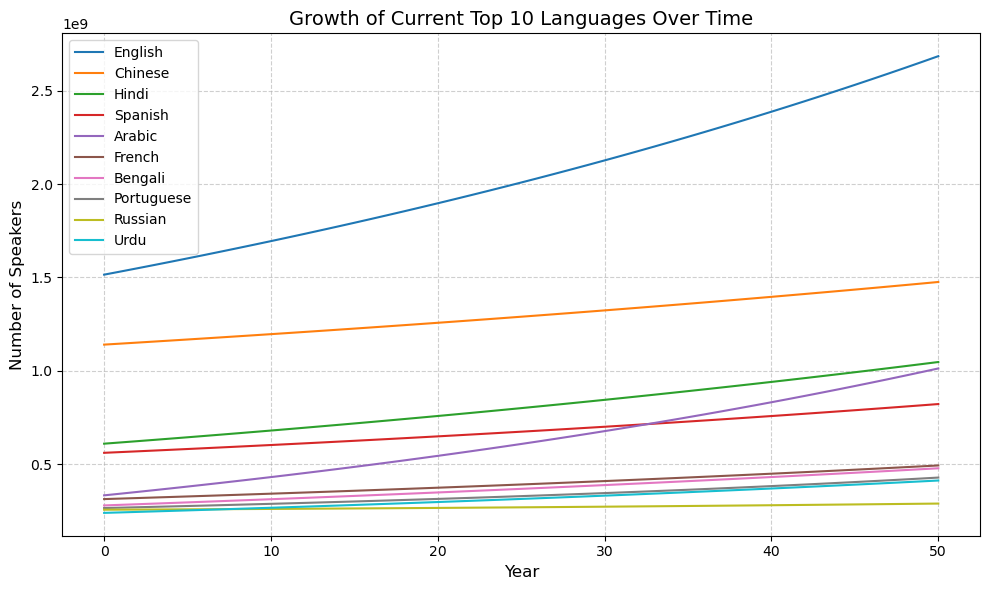

In [171]:
def lang_plot(language, time):
    lang_df = change_per_time_new(language, time)
    years = lang_df["time(years)"]
    speakers = lang_df["speakers"]
    plt.plot(years, speakers, label=language)
    
    

plt.figure(figsize=(10, 6))
for language in language_dict.keys():
    lang_plot(language, 50)


# Adding labels and title
plt.title('Growth of Current Top 10 Languages Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Speakers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the graph
plt.show()

In [28]:
language_data

,Language,PLI_2016,PLI_2050,S_L(0),L2(0)
0,English,0.889,0.877,1515000000,1135000000
1,Chinese,0.411,0.515,1140000000,199000000
2,Hindi,0.117,0.138,609000000,264000000
3,Spanish,0.329,0.345,560000000,74000000
4,Arabic,0.273,0.295,332000000,332000000
5,French,0.337,0.325,312000000,238000000
6,Bengali,0.029,0.029,278000000,41000000
7,Portuguese,0.119,0.149,264000000,27000000
8,Russian,0.244,0.242,255000000,108000000
9,Urdu,0.040,0.040,238000000,168000000


In [42]:
from sklearn.linear_model import LinearRegression

# Step 1: Example input DataFrame


# Step 2: Prepare the data
years = np.array([2016, 2050]).reshape(-1, 1)  # Independent variable (years)

# Initialize an empty list to store the results
results = []

# Step 3: Train a Linear Regression model for each language
for _, row in language_data.iterrows():
    language = row["Language"]
    pli_values = np.array([row["PLI_2016"], row["PLI_2050"]]).reshape(-1, 1)  # Dependent variable
    
    model = LinearRegression()
    model.fit(years, pli_values)
    
    # Step 4: Predict PLI for each year from 2016 to 2074
    future_years = np.arange(2016, 2075).reshape(-1, 1)  # Range of years
    predicted_pli = model.predict(future_years)
    
    # Store predictions in the results list
    for year, pli in zip(future_years.flatten(), predicted_pli.flatten()):
        results.append({"Language": language, "Year": year, "PLI": pli})

# Step 5: Create the final DataFrame
df_PLI = pd.DataFrame(results)

df_PLI

,Language,Year,PLI
0,English,2016,0.889000
1,English,2017,0.888647
2,English,2018,0.888294
3,English,2019,0.887941
4,English,2020,0.887588
...,...,...,...
585,Urdu,2070,0.040000
586,Urdu,2071,0.040000
587,Urdu,2072,0.040000
588,Urdu,2073,0.040000


In [44]:
language_index = {"English" : 0, "Chinese": 1, "Hindi" : 2, "Spanish" : 3, "Arabic" : 4, 
                 "French" : 5, "Bengali" : 6, "Portuguese" : 7, "Russian" : 8, "Urdu" : 9}

In [158]:
def change_per_country_table(language, country, time):     
    
    row = country_data[country_data["i"] == country]
    lang_index = language_dict[language]
    p_L = float(row[lang_index])
    birth_rate = float(row["b^i"])
    death_rate = float(row["d^i"])
    migration_rate = float(row["m^i"])
    N_0 = float(row["N^i(0)"])
    current_pop = float(N_0 * p_L)
    # current_pop = init_pop* pow(1 + birth_rate - death_rate + migration_rate, time)
    # change = p_L*(birth_rate - death_rate + migration_rate)*pow(1 + birth_rate - death_rate + migration_rate,time)*init_pop
    # next_pop = float(p_L*birth_rate*current_pop - p_L*death_rate*current_pop + p_L*migration_rate*current_pop)
    # return next_pop

 
    df_lang_in_country = pd.DataFrame(columns=["time(years)", "speakers"])
    for i in range(1,time+1):
        df_lang_in_country.loc[i-1] = [i-1,current_pop]
        current_pop = current_pop +  p_L * (birth_rate - death_rate) * pow(1 + birth_rate - death_rate + migration_rate, i) * N_0
        # df_lang_in_country.loc[i,"speakers"] = current_pop
    return df_lang_in_country


change_per_country_table("English", "united-states", 50)

,time(years),speakers
0,0.0,2.807520e+08
1,1.0,2.817977e+08
2,2.0,2.828504e+08
3,3.0,2.839103e+08
4,4.0,2.849772e+08
5,5.0,2.860512e+08
6,6.0,2.871325e+08
7,7.0,2.882209e+08
8,8.0,2.893167e+08
9,9.0,2.904199e+08


In [5]:
# this is the function used in the model

def change_per_time_new(language, time):
    df = pd.DataFrame(columns=["time(years)", "speakers"])
    lang_row = language_data[language_data["Language"] == language]
    initial_speakers = float(lang_row["S_L(0)"])
    df.loc[0] = [0, initial_speakers]
    i_value = initial_speakers
    L2_0 = language_data.loc[language_index[language], "L2(0)"]
    
    for i in range(1,time+1):
        df.loc[i] = [i,0]

        for country in country_list:
            df_country = change_per_country_table(language, country, time+1)
            # df_L2 = L2_table(language, country, time+1)
            change = df_country.loc[i,"speakers"] - df_country.loc[i-1,"speakers"]
            i_value += change

        
        PLI_lang = df_PLI[df_PLI["Language"] == language]
        PLI_2024_row = PLI_lang[PLI_lang["Year"] == 2024]
        PLI_2024 = float(PLI_2024_row["PLI"])
        PLI_row = PLI_lang[PLI_lang["Year"] == 2024 + i]
        PLI_ratio = float(PLI_row["PLI"])/PLI_2024

        i_value += PLI_ratio * L2_0 * pow(1.01, i) * 0.01
                
        df.loc[i, "speakers"] = i_value
        

     

    return df



In [ ]:
# ignore this

def change_per_time(language, time):
    df = pd.DataFrame(columns=["time(years)", "speakers"])
    lang_row = language_data[language_data["Language"] == language]
    initial_speakers = float(lang_row["S_L(0)"])
    L2_initial = language_data.loc[language_index[language], "L2(0)"]
    for i in range(1,time+1):
        df.loc[i-1] = [i,0]
        i_value = initial_speakers
        for country in country_list:
            i_value += change_per_country(language, country, i)
        # Adding L2 factor
        PLI_lang = df_PLI[df_PLI["Language"] == language]
        PLI_2024_row = PLI_lang[PLI_lang["Year"] == 2024]
        PLI_2024 = float(PLI_2024_row["PLI"])
        PLI_row = PLI_lang[PLI_lang["Year"] == 2024 + i - 1]
        PLI_ratio = float(PLI_row["PLI"])/PLI_2024
        i_value += PLI_ratio * L2_initial * pow(1.01,i)* 0.01
        df.loc[i-1, "speakers"] = i_value

   
    return df



In [136]:
def L2_table(language, country, time):

    df_L2 = pd.DataFrame(columns=["time(years)", "speakers"])
   
    L2_current = language_data.loc[language_index[language], "L2(0)"]
    df_PLI[df_PLI["Language"] == language]
    PLI_lang = df_PLI[df_PLI["Language"] == language]
    PLI_2024_row = PLI_lang[PLI_lang["Year"] == 2024]
    PLI_2024 = float(PLI_2024_row["PLI"])

    df_L2.loc[0] = [0, L2_current]

    for i in range(1,time+1): 
        PLI_row = PLI_lang[PLI_lang["Year"] == 2024 + i - 1]
        PLI_ratio = float(PLI_row["PLI"])/PLI_2024
        L2_current += PLI_ratio * L2_current * pow(1.01,i)* 0.01
        df_L2.loc[i] = [i, L2_current]
    
    
    
    
    return df_L2


L2_table("English", "united-states", 50)


,time(years),speakers
0,0.0,1.135000e+09
1,1.0,1.146464e+09
2,2.0,1.158154e+09
3,3.0,1.170077e+09
4,4.0,1.182238e+09
5,5.0,1.194644e+09
6,6.0,1.207300e+09
7,7.0,1.220213e+09
8,8.0,1.233389e+09
9,9.0,1.246836e+09
